
# SPAIN-AI 2020 Hackathon Reto Series Temporales
> Cómo No Ganar Un Reto

- toc: true
- badges: true
- comments: true
- categories: [SPAIN-AI, time_series, competition]
- image: images/envios.png

> _If ifs and ands were pots and pans..._

https://www.spain-ai.com/hackathon2020_reto_Series_Temporales.php

https://competitions.codalab.org/competitions/28630

# PowerPoint Presentation 15 Mayo 2021

In [1]:
#hide
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

% cd "/content/gdrive/My Drive/Colab Notebooks/TimeSeries"

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/TimeSeries


In [2]:
#hide
USERNAME='AlisonD'
PASSWORD='0hf95Gen1k3v64'

Imports

In [3]:
#collapse-hide
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.simplefilter("ignore", UserWarning)

pd.set_option('display.max_rows', 100)

# Reto: Lo que tienía que hacer

### Entender el reto

Crea una cartera de activos (`darwins`), maximizando el `ratio de Sharpe`:

- escoje 18 `darwins` de los 96 que están en los datos de entrenamiento
- asigna una parte de la inversión total a cada uno de los 18 `darwins` 
- ajusta la asignación a lo largo del tiempo, cada hora desde el 18 agosto 2020 hasta el 24 diciembre 2020, los 2229 horas  que están en el fichero `submission.csv`
- calcula el ratio de Sharpe

No es un problema de predicción (todos los datos son disponible el `darwinex.com`) pero de creación de una cartera diversificada de activos no correlacionados entre sí, que tienen rendimientos estables.

La **métrica** a maximizar 

$$S = \frac{E[R_a-R_b]}{\sigma_a}$$

$R_a$ es el rendimiento de la cartera

$R_b$ es el rendimiento de una inversión de referencia

$\sigma_a$ es la desviación estándar (volatilidad) del exceso de rendimiento de la inversión

Asumiendo que  $R_b$ fuera constante, hay que maximizar el rendimiento dividido por la volatilidad, así que **buscamos rendimientos estables**.

Necesita % inversión por cada hora

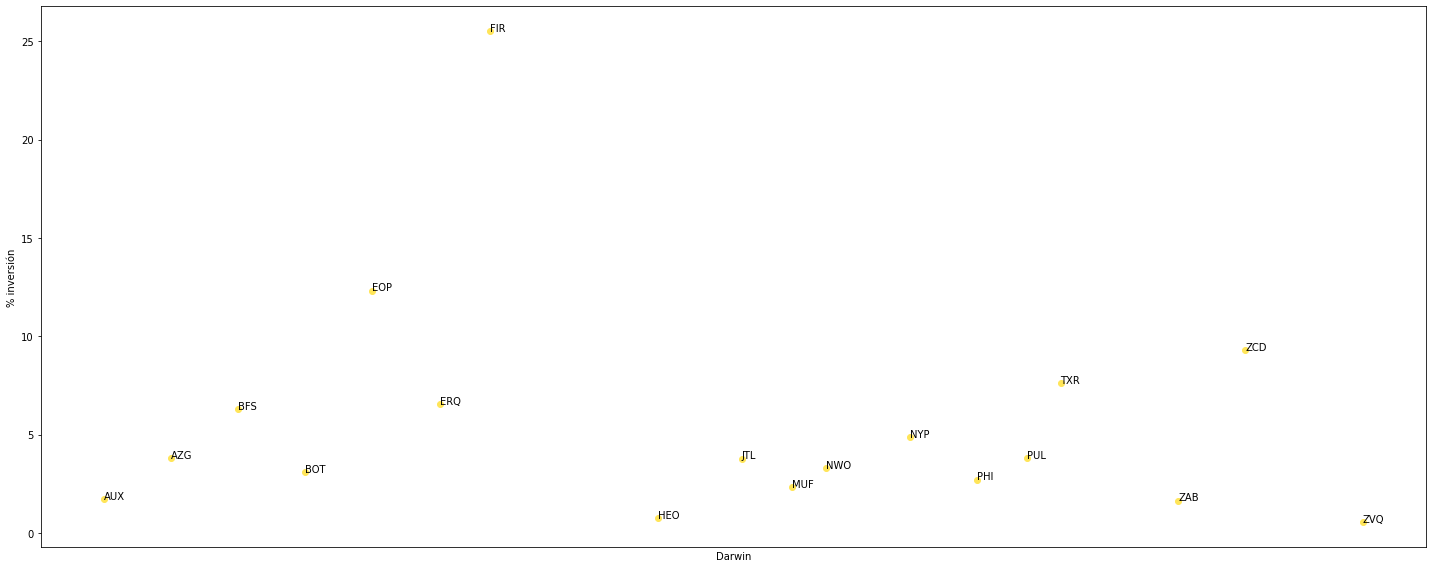

In [ ]:
#collapse-hide
xs = [2,6,10,14,18,22,25,35,40,43,45,50,54,57,59,66,70,77]
ys = np.array([0.0173,0.0379,0.0629,0.0309,0.1232,0.0654,0.2552,0.0076,0.0378,0.0235,0.0329,0.0487,0.0272,0.0383,0.0762,0.0165,0.0930,0.0055])*100
fig = plt.figure(figsize=(20,8))

ax = fig.add_subplot()
ax.scatter(xs,ys, color='#ffe559')
ax.set_xlabel('Darwin')
ax.set_ylabel('% inversión')
annotations=['AUX', 'AZG', 'BFS', 'BOT', 'EOP', 'ERQ', 'FIR', 'HEO', 'JTL', 'MUF', 'NWO', 'NYP', 'PHI', 'PUL', 'TXR', 'ZAB', 'ZCD', 'ZVQ']
for i, label in enumerate(annotations):
    plt.annotate(label, (xs[i], ys[i]))
plt.xticks([])
plt.tight_layout()
plt.savefig("darwins.png") 
plt.show()

# Realidad: Lo que hice



### Explora los datos históricos de entrenamiento - calcula `score`





In [ ]:
candles=pd.DataFrame(columns=['date','close','max','min','open','std_dev','score','darwin'])
filenames = [x for x in os.listdir('./data/TrainCandles')]
for filename in filenames:
  df=pd.read_csv('./data/TrainCandles/'+filename).rename(columns={'Unnamed: 0':'date'})
  df.date = pd.to_datetime(df.date)
  df['std_dev']=df.std(axis=1)
  df['score']=(round((df.close-df.open)/df.std_dev,6)).fillna(0)
  df['darwin']=filename[-13:-10]
  candles=candles.append(df)

candles.head() 

,date,close,max,min,open,std_dev,score,darwin
0,2019-08-04 21:00:00,110.40,110.46,110.37,110.38,0.040311,0.496139,HCC
1,2019-08-04 22:00:00,110.57,110.63,110.32,110.41,0.142683,1.121370,HCC
2,2019-08-04 23:00:00,110.49,110.57,110.45,110.57,0.060000,-1.333333,HCC
3,2019-08-05 00:00:00,110.51,110.60,110.38,110.48,0.090692,0.330791,HCC
4,2019-08-05 01:00:00,109.94,110.68,109.90,110.50,0.394081,-1.421027,HCC


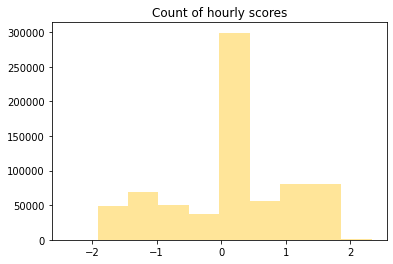

In [ ]:
plt.hist(candles.score, color='#FFE599')
plt.title('Count of hourly scores');

Identifica qué `darwin` tenía el máximo `score` en cada hora.

Conta cuánto veces cada `darwin` tiene el máximo `score`.

Investiga esos `darwins` primero.

In [ ]:
lst=[candles[(candles['date']==hour) & (candles.score==candles[candles['date']==hour].score.max())].darwin.to_list()[0] for hour in sorted(candles['date'].unique())]
count_dict=Counter(lst)
df=pd.DataFrame.from_dict(count_dict, orient='index').sort_values(0, ascending=False)
darwins_lst=df.index.to_list()
darwins_lst=darwins_lst+['MMY','TMF'] # the 2 darwins that never had max score
df.T

,BSX,FNM,ZTY,CBY,NYD,TKT,BFS,NWO,HZY,NVL,YEC,TER,PUL,VRT,NCT,MUF,FSK,PEW,LEN,LUG,PHI,BGN,TXR,UYZ,MET,REU,UEI,ZVQ,ZCD,SYO,BZC,XRX,ULT,HQU,WWT,CIS,TRO,FFV,MCA,AWW,...,OXR,ACY,GRI,HCC,PPT,FIR,ULI,ZAB,ZUJ,SKN,EEY,SKI,SEH,NSC,SHC,EOP,WXN,LHB,SBY,IDT,RWJ,JTL,JNE,CSB,DIG,YFC,DZF,ERO,BAX,ERQ,NYP,AUX,GRU,UPP,BOT,USX,JHI,PME,THA,YAX
0,539,512,457,455,397,396,343,341,314,311,290,281,260,221,210,208,187,178,169,145,140,138,132,114,111,102,99,99,85,84,81,78,76,70,66,63,63,56,55,54,...,32,31,30,30,30,29,28,28,28,27,24,24,23,22,21,21,21,21,21,21,20,20,19,19,15,15,14,14,12,11,8,8,7,6,5,5,5,4,3,1


In [ ]:
#collapse-hide
def plot_historic_dars(dars):
  rows, cols=2, int(.5+len(dars)/2)
  fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize=(20, 8))
  for i in range(rows):
    for j in range(cols):
      darwin=dars[cols*i+j]
      ax[i][j].plot(candles[candles.darwin==darwin].date.apply(lambda x: x.date()),candles[candles.darwin==darwin]['open']-candles[candles.darwin==darwin]['open'][0], color='#ffd966')
      ax[i][j].set_title(darwin, color='#ffd966', loc='center', y=0.9)
      ax[i][j].set_ylim(-50,100)
      ax[i][j].set_frame_on(False)
      ax[i][j].set_xlabel('Periodo de Entrenamiento')
      ax[i][j].set_xticklabels([])
      ax[i][j].axhline(y=0, color='grey', linestyle='dotted')

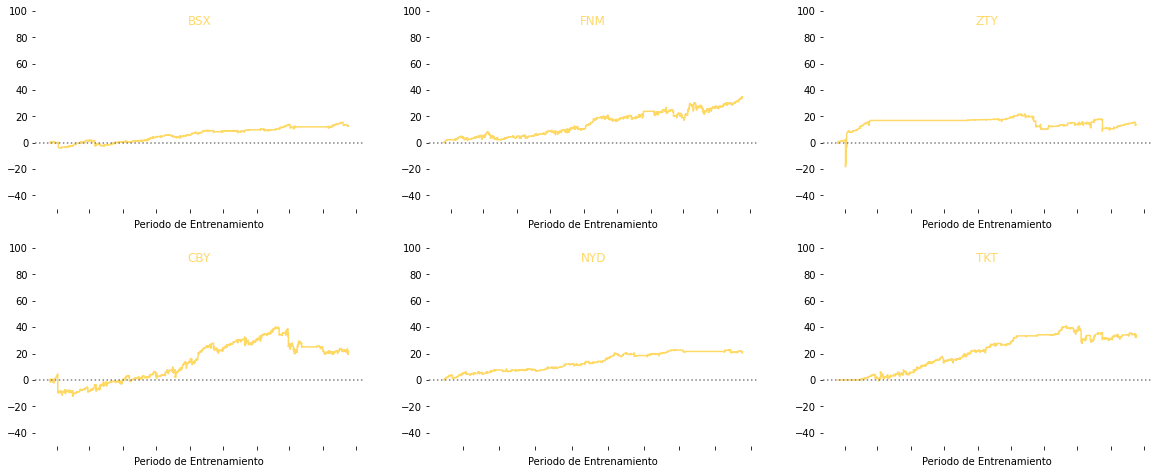

In [ ]:
plot_historic_dars(df.index[:6])

### Descarga datos de los `darwins` con más horas de máximo `score`
 
Desde agosto 2020 hasta diciembre 2020 desde darwinex.com, utilizando `ftp`
https://github.com/darwinex/darwinexapis/blob/master/darwinexapis/API/DarwinDataAnalyticsAPI/DWX_Data_Analytics_API.py

In [ ]:
top=['BSX','FNM','ZTY','CBY','NYD','TKT','BFS','NWO','HZY','NVL','YEC','TER','PUL','VRT','NCT','MUF','FSK','PEW','LEN','LUG','PHI','BGN','TXR','UYZ','MET','REU','UEI','ZVQ',
     'ZCD','SYO','BZC','XRX','ULT','HQU','WWT','CIS','TRO','FFV','MCA','AWW','GGR','AZG','GFJ','LWK','VVC','WFJ','OJG','OOS','SRI','LWE','HEO','RAT','TDD','ZXW','OXR','ACY',
     'GRI','HCC','PPT','FIR','ULI','ZAB','ZUJ','SKN','EEY','SKI','SEH','NSC','SHC','EOP','WXN','LHB','SBY','IDT','RWJ','JTL']

Imports and server

In [ ]:
#collapse-hide
from ftplib import FTP
from tqdm import tqdm
from io import BytesIO
import gzip

FTP_CRED = {'username': USERNAME,
            'password': PASSWORD,
            'server': "darwindata.darwinex.com",
            'port': 21}

dwx_ftp_hostname=FTP_CRED['server']
dwx_ftp_user=FTP_CRED['username']
dwx_ftp_pass=FTP_CRED['password']

server = FTP(dwx_ftp_hostname)
server.login(dwx_ftp_user, dwx_ftp_pass)

'230-Your bandwidth usage is restricted\n230 OK. Current restricted directory is /'

{DARWIN_TICKER}.{PRODUCT_RISK}.{COLOUR}_{PRODUCTID}_YYYY-MM-DD.HH.csv.gz
'former_var10'

In [ ]:
year='2020'
darwins_lst_dld=['FNM']
for darwin in darwins_lst_dld:
  print(darwin)
  for month in ['08','09','10','11','12']: 
    quote_files = []
    server.retrlines(f'NLST {darwin}/_{darwin}_former_var10/quotes/{year}-{month}/', quote_files.append)
    quote_files = [f'{darwin}/_{darwin}_former_var10/quotes/{year}-{month}/{quote_file}' for quote_file in quote_files]
  
    # Process tick data files
    tqdm.write(f'\n[KERNEL] {len(quote_files)} files retrieved.. post-processing now, please wait..', end='')
    ticks_df = pd.DataFrame()
    ticks_pbar = tqdm(quote_files, position=0, leave=True)
            
    for tick_file in ticks_pbar:
      # Clear / reinitialize buffer
      retbuf = BytesIO()
      server.retrbinary(f"RETR {tick_file}", retbuf.write)
      retbuf.seek(0)
      # Extract data from BytesIO object
      ret = [line.strip().decode().split(',') for line in gzip.open(retbuf)]
      ticks_df = pd.concat([ticks_df, pd.DataFrame(ret[1:])], axis=0)

    # Clean up
    ticks_df.columns = ['timestamp','quote']
    ticks_df.timestamp = ticks_df.timestamp.apply(pd.to_numeric)
    ticks_df.set_index('timestamp', drop=True, inplace=True)
    ticks_df.index = pd.to_datetime(ticks_df.index, unit='ms')
    ticks_df.quote = ticks_df.quote.apply(pd.to_numeric)
    ticks_df.dropna()
    fn='quotes/'+darwin+'_'+year+'_'+month+'_quotes.csv'
    ticks_df.to_csv('./data/'+fn)

FNM


  0%|          | 0/228 [00:00<?, ?it/s]


[KERNEL] 228 files retrieved.. post-processing now, please wait..

  0%|          | 0/259 [00:00<?, ?it/s]


[KERNEL] 259 files retrieved.. post-processing now, please wait..

  0%|          | 0/288 [00:00<?, ?it/s]


[KERNEL] 288 files retrieved.. post-processing now, please wait..

  0%|          | 0/331 [00:00<?, ?it/s]


[KERNEL] 331 files retrieved.. post-processing now, please wait..

  0%|          | 0/225 [00:00<?, ?it/s]


[KERNEL] 225 files retrieved.. post-processing now, please wait..

100%|██████████| 225/225 [01:39<00:00,  2.25it/s]


new

In [ ]:
darwins_lst_dld=['PPT']
for darwin in darwins_lst_dld:  #to do
  print(darwin)
  for month in ['08','09','10','11','12']:
    quote_files = []
    server.retrlines(f'NLST {darwin}/quotes/{year}-{month}/', quote_files.append)
    quote_files = [f'{darwin}/quotes/{year}-{month}/{quote_file}' for quote_file in quote_files]

    # Process tick data files
    tqdm.write(f'\n[KERNEL] {len(quote_files)} files retrieved.. post-processing now, please wait..', end='')
    ticks_df = pd.DataFrame()
    ticks_pbar = tqdm(quote_files, position=0, leave=True)
            
    for tick_file in ticks_pbar:
      # Clear / reinitialize buffer
      retbuf = BytesIO()
      server.retrbinary(f"RETR {tick_file}", retbuf.write)
      retbuf.seek(0)
      # Extract data from BytesIO object
      ret = [line.strip().decode().split(',') for line in gzip.open(retbuf)]
      ticks_df = pd.concat([ticks_df, pd.DataFrame(ret[1:])], axis=0)

    # Clean up
    ticks_df.columns = ['timestamp','quote']
    ticks_df.timestamp = ticks_df.timestamp.apply(pd.to_numeric)
    ticks_df.set_index('timestamp', drop=True, inplace=True)
    ticks_df.index = pd.to_datetime(ticks_df.index, unit='ms')
    ticks_df.quote = ticks_df.quote.apply(pd.to_numeric)
    ticks_df.dropna()
    fn='quotes/'+darwin+'_'+year+'_'+month+'_quotes.csv'
    ticks_df.to_csv('./data/'+fn)

PPT


  0%|          | 0/511 [00:00<?, ?it/s]


[KERNEL] 511 files retrieved.. post-processing now, please wait..

  0%|          | 0/428 [00:00<?, ?it/s]


[KERNEL] 428 files retrieved.. post-processing now, please wait..

  0%|          | 0/26 [00:00<?, ?it/s]


[KERNEL] 26 files retrieved.. post-processing now, please wait..

  0%|          | 0/26 [00:00<?, ?it/s]


[KERNEL] 26 files retrieved.. post-processing now, please wait..

  0%|          | 0/26 [00:00<?, ?it/s]


[KERNEL] 26 files retrieved.. post-processing now, please wait..

100%|██████████| 26/26 [00:10<00:00,  2.53it/s]


### Asigna porcentajes

Crea una cartera de los top 18 `darwins` e investiga su ratio de Sharpe variando porcentajes asignados

In [ ]:
def create_hourly(fn, darwin):
  df=pd.read_csv('./data/quotes/'+fn)
  df.timestamp=pd.to_datetime(df.timestamp)
  df['date']=df.timestamp.dt.date
  df['hour']=df.timestamp.dt.hour
  df1=df.groupby(['date','hour']).agg({'quote': ['min','max','var','count','first','last']}).fillna(0)
  df1.columns=df1.columns.droplevel()
  df1['darwin']=darwin
  return df1

Importa los datos

In [ ]:
hourly = pd.DataFrame(columns=['min','max','var','count','first','last','score','darwin'])
for darwin in top:
  for filename in [darwin+'_2020_08_quotes.csv',
                   darwin+'_2020_09_quotes.csv',
                   darwin+'_2020_10_quotes.csv',
                   darwin+'_2020_11_quotes.csv',
                   darwin+'_2020_12_quotes.csv']:
    hourly=hourly.append(create_hourly(filename, darwin))

hourly['score']=round((hourly['last']-hourly['first'])/np.sqrt(hourly['var']),4).fillna(0)
hourly['return']=hourly['last']-hourly['first']

hourly.reset_index(inplace=True)
hourly.rename(columns={'index':'hour'},inplace=True)
hourly.hour=hourly.hour.apply(lambda x: pd.Timestamp(x[0])+pd.to_timedelta(x[1], unit='h'))

print(hourly.shape)
hourly.head()

(108844, 10)


,hour,min,max,var,count,first,last,score,darwin,return
0,2020-08-02 21:00:00,126.4739,126.4739,0.000000,1,126.4739,126.4739,0.0000,BSX,0.0000
1,2020-08-03 20:00:00,126.4538,126.6039,0.000996,1506,126.4659,126.5240,1.8409,BSX,0.0581
2,2020-08-03 21:00:00,126.2886,126.7286,0.012971,57,126.4920,126.7286,2.0774,BSX,0.2366
3,2020-08-04 21:00:00,126.7286,126.7286,0.000000,1,126.7286,126.7286,0.0000,BSX,0.0000
4,2020-08-05 21:00:00,126.4861,126.8366,0.003487,543,126.7286,126.7779,0.8348,BSX,0.0493


df de rendimientos por hora por cada darwin desde el 18 agosoto 2020 hasta el 24 diciembre 2020


In [ ]:
dars=sorted(hourly.darwin.unique())
lst=[hourly[hourly.darwin==dar][(hourly.hour>='2020-08-18 00:00:00') & (hourly.hour<'2020-12-24 22:00:00')][['hour','return']].rename(columns={'return':dar}) for i,dar in enumerate(dars)]
hly_rtns=pd.merge(lst[0], lst[1], how='outer')
for i in range(2,len(dars)):
  hly_rtns=pd.merge(hly_rtns,lst[i], how='outer')
hly_rtns.fillna(0., inplace=True)
hly_rtns.head()

,hour,ACY,AWW,AZG,BFS,BGN,BSX,BZC,CBY,CIS,EEY,EOP,FFV,FIR,FNM,FSK,GFJ,GGR,GRI,HCC,HEO,HQU,HZY,IDT,JTL,LEN,LHB,LUG,LWE,LWK,MCA,MET,MUF,NCT,NSC,NVL,NWO,NYD,OJG,OOS,OXR,PEW,PHI,PPT,PUL,RAT,REU,RWJ,SBY,SEH,SHC,SKI,SKN,SRI,SYO,TDD,TER,TKT,TRO,TXR,UEI,ULI,ULT,UYZ,VRT,VVC,WFJ,WWT,WXN,XRX,YEC,ZAB,ZCD,ZTY,ZUJ,ZVQ,ZXW
0,2020-08-18 08:00:00,-0.2046,0.0280,-0.2541,0.0,0.0,0.0,0.0451,0.0764,0.0,0.0204,-0.1279,0.3504,0.0,0.0,0.0,-0.2471,0.0,-0.3225,0.4445,0.0,0.0,0.0,0.0,0.0,-0.4258,0.0,-0.3640,0.1924,0.1630,0.0907,-0.1216,0.0,0.0,0.2144,0.0,0.0,0.0,0.0,-0.1580,-0.2996,0.0,0.0,-0.0489,0.0347,0.0000,0.0,0.0,-0.1468,-0.2239,-0.5369,0.1110,0.0789,0.1928,0.3188,0.3515,-0.0600,0.0,-0.2799,0.0,0.0,0.0607,0.7122,0.0000,-0.1237,0.0,-0.3184,0.0,0.042,0.0,0.0125,-1.0387,0.0641,0.0,-0.1574,-0.0757,0.1344
1,2020-08-18 09:00:00,-0.7715,-0.0205,-0.0352,0.0,0.0,0.0,-0.0134,0.0346,0.0,0.0018,0.2048,0.2084,0.0,0.0,0.0,0.0683,0.0,0.0423,0.0228,0.0,0.0,0.0,0.0,0.0,0.1580,0.0,0.0246,0.0571,-0.0628,0.0239,-0.0345,0.0,0.0,-0.2015,0.0,0.0,0.0,0.0,-0.1657,0.2175,0.0,0.0,0.1492,0.0629,0.0000,0.0,0.0,-0.0538,-0.0820,0.0460,0.0350,0.1163,-0.0742,0.7048,0.1127,-0.0921,0.0,-0.5873,0.0,0.0,-0.0594,-0.2741,0.0000,0.0460,0.0,-0.6679,0.0,0.000,0.0,-0.0682,-0.2051,0.0091,0.0,0.0584,0.2911,0.0653
2,2020-08-18 10:00:00,-0.2072,-0.0200,0.1754,0.0,0.0,0.0,-0.0350,0.1176,0.0,0.0226,-0.1140,-0.4030,0.0,0.0,0.0,0.0297,0.0,0.1094,0.0920,0.0,0.0,0.0,0.0,0.0,0.0559,0.0,0.2155,0.0632,-0.0206,-0.0736,0.0585,0.0,0.0,-0.0541,0.0,0.0,0.0,0.0,0.0236,-0.0774,0.0,0.0,-0.0878,0.0000,0.0000,0.0,0.0,-0.0460,0.0943,0.4213,0.0459,-0.4226,-0.0244,0.0976,-0.1895,-0.0513,0.0,1.1642,0.0,0.0,-0.0903,-0.0901,-0.0284,0.0162,0.0,1.3240,0.0,0.000,0.0,0.0551,0.5658,-0.0328,0.0,0.0207,-0.1894,-0.1592
3,2020-08-18 11:00:00,0.5182,0.0139,0.0390,0.0,0.0,0.0,0.0380,-0.5722,0.0,0.0014,-0.2086,0.1120,0.0,0.0,0.0,-0.0700,0.0,-0.7223,0.0110,0.0,0.0,0.0,0.0,0.0,-0.1070,0.0,-0.4118,-0.0863,0.0421,-0.0578,-0.1186,0.0,0.0,0.1353,0.0,0.0,0.0,0.0,-0.1538,-0.2806,0.0,0.0,-0.0575,0.0000,0.0000,0.0,0.0,0.0459,0.2790,-0.6534,-0.0834,0.6474,0.0498,-0.2464,-0.1914,0.0224,0.0,-0.3642,0.0,0.0,-0.0455,0.1842,0.5276,-0.0311,0.0,-0.4142,0.0,0.000,0.0,-0.3371,0.3899,0.0122,0.0,-0.0396,0.1832,-0.0821
4,2020-08-18 12:00:00,3.4317,0.0743,-0.2758,0.0,0.0,0.0,0.0951,-0.2141,0.0,0.1189,-0.3103,0.3893,0.0,0.0,0.0,-0.3064,0.0,-0.6439,0.5604,0.0,0.0,0.0,0.0,0.0,-0.7154,0.0,-0.7258,0.5191,0.2783,0.1409,-0.2989,0.0,0.0,0.9024,0.0,0.0,0.0,0.0,0.2012,-0.3565,0.0,0.0,-0.0169,-0.0354,-0.0161,0.0,0.0,0.0484,0.1981,-0.4841,0.5091,0.6564,0.3292,0.6209,-0.2148,-0.0089,0.0,-1.0961,0.0,0.0,0.3504,0.7548,0.5344,-0.1306,0.0,-1.2466,0.0,0.000,0.0,0.2408,-1.1173,0.1225,0.0,-0.2655,0.7707,0.4010


darwins con el rendimiento medio por hora más alto


In [ ]:
means=pd.DataFrame(hly_rtns.mean(0), columns=['mean'])
means.sort_values('mean', ascending=False).T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


,ZVQ,AZG,BFS,WFJ,JTL,HZY,PHI,NWO,ZCD,BGN,UYZ,TKT,SRI,EOP,PUL,ZAB,CBY,SEH,HEO,TXR,MUF,FIR,UEI,HCC,VRT,LHB,LEN,RAT,NVL,LUG,NCT,NSC,PEW,EEY,OJG,VVC,ACY,BSX,TER,IDT,ZTY,REU,MCA,ULI,NYD,FNM,XRX,HQU,ZUJ,YEC,RWJ,PPT,OXR,FSK,TRO,GRI,WWT,ULT,SKN,MET,WXN,LWK,FFV,GFJ,OOS,GGR,SBY,ZXW,SHC,AWW,SYO,LWE,SKI,TDD,BZC,CIS
mean,0.016565,0.013742,0.012682,0.012105,0.011587,0.011354,0.011118,0.010866,0.009491,0.009225,0.008431,0.008265,0.007448,0.007073,0.006668,0.006646,0.006444,0.006398,0.006105,0.006048,0.005723,0.005046,0.004573,0.004247,0.004117,0.004057,0.003757,0.003454,0.003395,0.003355,0.003305,0.003144,0.002914,0.002684,0.002597,0.002502,0.002462,0.002205,0.001809,0.001796,0.001619,0.001504,0.001236,0.001217,0.001191,0.001183,0.001126,0.001087,0.000908,0.000843,0.000571,0.00055,0.000469,0.000154,0.000086,0.00008,0.000067,-0.000287,-0.001176,-0.00143,-0.002289,-0.002452,-0.003837,-0.004461,-0.004783,-0.005201,-0.00663,-0.006832,-0.007273,-0.009089,-0.009591,-0.010118,-0.011254,-0.01147,-0.016548,-0.017419


### Historial de envíos




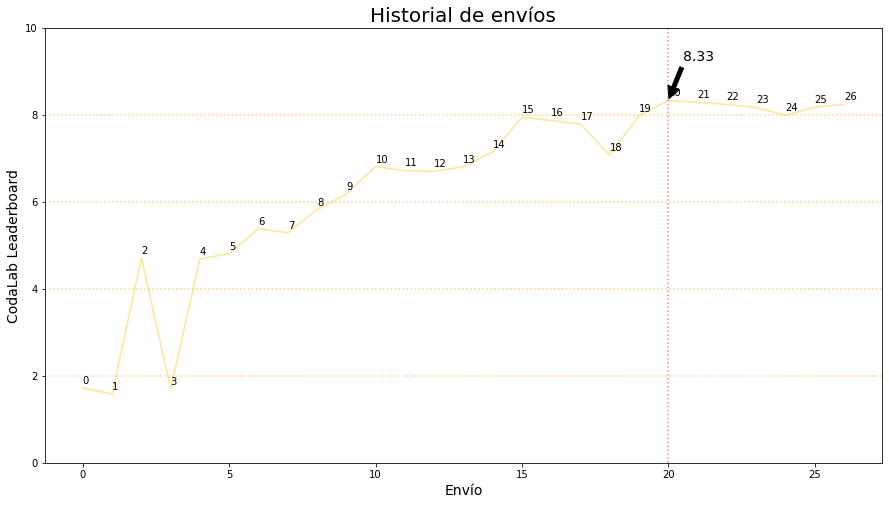

In [4]:
results=[1.72, 1.58, 4.71, 1.7, 4.69, 4.81, 5.38, 5.29, 5.82, 6.18, 6.81, 6.72, 6.70, 6.81, 7.15, 7.94, 7.87, 7.79, 7.08, 7.98, 8.33, 8.29, 8.24, 8.17, 7.99, 8.18, 8.24]
# quitando resultados NAN cuando la suma de la fila no era exactamente 1.0
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(results, color='#ffe599')
ax.set_title('Historial de envíos', fontsize=20)
ax.set_xlabel('Envío', fontsize=14)
ax.set_ylabel('CodaLab Leaderboard', fontsize=14)
ax.set_ylim(0,10)
ax.annotate('8.33', xy=(20, 8.33),  xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            fontsize=14
            )
ax.axvline(x=20, ymin=0, ymax=1, color='red', alpha=.5, linestyle='dotted')
ax.axhline(y=2, xmin=0, xmax=1, color='orange', alpha=.5, linestyle='dotted')
ax.axhline(y=4, xmin=0, xmax=1, color='orange', alpha=.5, linestyle='dotted')
ax.axhline(y=6, xmin=0, xmax=1, color='orange', alpha=.5, linestyle='dotted')
ax.axhline(y=8, xmin=0, xmax=1, color='orange', alpha=.5, linestyle='dotted')

for i, label in enumerate(range(27)):
    ax.annotate(label, (i, results[i]+.1));

plt.savefig('envios.png')

- 2 - asignar a cada `darwin` 1/18 de la inversión, sin cambiar al largo del tiempo: 'ysharpe_ratio': 4.71, 'cumulative_return': 4.92

- 6 - agrupar los 18 `darwins` en 3 grupos: bajo, medio y alto rendimiento. Menor peso por los bajos, más peso por los altos. 'ysharpe_ratio': 5.38, 'cumulative_return': 5.97

- 10 - https://es.mathworks.com/help/finance/portfolio.estimatemaxsharperatio.html?s_tid=srchtitle con MATLAB instalado en el PC, quitando FNM, MET, NVL, REU, VRT y añadiendo ZTY, NYD, TKT, NWO, YEC. Optimizar en MATLAB.

- 15 - 3 rondas de top 22 `darwins` y luegor quitar 4

- 20 - descargar datos por más `darwins`

Coge los primeros 22 Darwins del listado y pone sus medios de `return`,`AssetMean` y covarianzas `AssetCovar` en MATLAB https://www.mathworks.com/help/finance/portfolio.estimatemaxsharperatio.html 

‘Estimate Efficient Portfolio that Maximizes the Sharpe Ratio for a Portfolio Object with Semicontinuous and Cardinality Constraints’, 

para seleccionar los mejores 18 activos de los 22. (Con más de 22 activos muchas veces no daba `pesos` porque no convergió.)

```
p = Portfolio('AssetMean', AssetMean, 'AssetCovar', AssetCovar);
p = setDefaultConstraints(p); 
p = setMinMaxNumAssets(p, 18, 18); 
pesos = estimateMaxSharpeRatio(p,'Method','iterative')
````

Seguí bajando el listado de `darwins` quitando los 4 `darwins` dejado el el rondo anterior y añadiendo 4 más para ver si mejoraba el resultado.

Si el resultado era mejor, lo puse en el `Leaderboard`.

### Mi envío ganador

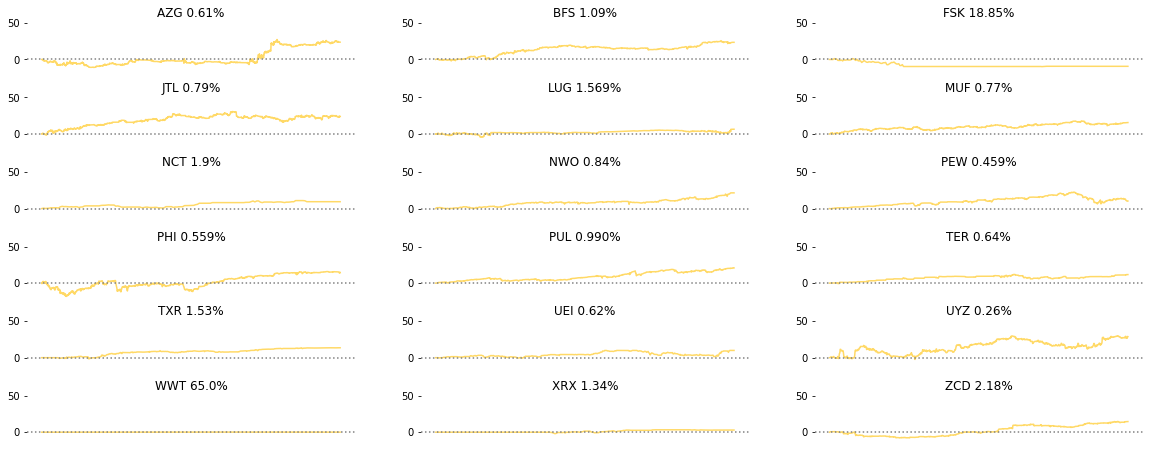

In [ ]:
#833
dars=['AZG','BFS','FSK','JTL','LUG','MUF','NCT','NWO','PEW','PHI','PUL','TER','TXR','UEI','UYZ','WWT','XRX','ZCD']
wts=[0.0061,0.0109,0.1885,0.0079,0.0157,0.0077,0.019,0.0084,0.0046,0.0056,0.0099000000000001,0.0064,0.0153,0.0062,0.0026,0.65,0.0134,0.0218]

fig , ax = plt.subplots(nrows = 6, ncols = 3, figsize=(20, 8))
rows,cols = 6,3
for i in range(rows):
  for j in range(cols):
    darwin=dars[cols*i+j]
    wt=' '+str(wts[cols*i+j]*100)[:5]+'%'
    ax[i][j].plot(range(len(hourly[hourly.darwin==darwin])),hourly[hourly.darwin==darwin]['first']-hourly[hourly.darwin==darwin]['first'].to_list()[0], color='#ffd966')
    ax[i][j].set_ylim(-35,50)
    ax[i][j].set_title(darwin+wt)
    ax[i][j].set_frame_on(False)
    ax[i][j].axes.get_xaxis().set_visible(False)
    ax[i][j].axhline(y=0, color='grey', linestyle='dotted')

### Crea archivo de envío

In [ ]:

# get 'eod_ts' from the example submission file
sub=pd.read_csv('./data/submission.csv')
sub.eod_ts = pd.to_datetime(sub.eod_ts)

# create new submission file
new_sub=pd.DataFrame(columns=dars)
new_sub['eod_ts']=sub.eod_ts
new_sub.set_index('eod_ts', inplace=True)

# % allocation for each darwin
for i,dar in enumerate(dars):
  new_sub[dar]=wts[i]

# check that all rows sum to 1.0
print(new_sub[dars].sum(1).sum())
assert new_sub[dars].sum(1).sum()==len(sub) 

# rename columns
for col in new_sub.columns:
  new_sub=new_sub.rename(columns={col:'allo_'+col})

# save submission file
new_sub.reset_index(inplace=True)
new_sub.to_csv('./data/sub.csv',index=False)
new_sub.head()

2229.0


,eod_ts,allo_AZG,allo_BFS,allo_FSK,allo_JTL,allo_LUG,allo_MUF,allo_NCT,allo_NWO,allo_PEW,allo_PHI,allo_PUL,allo_TER,allo_TXR,allo_UEI,allo_UYZ,allo_WWT,allo_XRX,allo_ZCD
0,2020-08-18 00:00:00,0.0061,0.0109,0.1885,0.0079,0.0157,0.0077,0.019,0.0084,0.0046,0.0056,0.0099,0.0064,0.0153,0.0062,0.0026,0.65,0.0134,0.0218
1,2020-08-18 01:00:00,0.0061,0.0109,0.1885,0.0079,0.0157,0.0077,0.019,0.0084,0.0046,0.0056,0.0099,0.0064,0.0153,0.0062,0.0026,0.65,0.0134,0.0218
2,2020-08-18 02:00:00,0.0061,0.0109,0.1885,0.0079,0.0157,0.0077,0.019,0.0084,0.0046,0.0056,0.0099,0.0064,0.0153,0.0062,0.0026,0.65,0.0134,0.0218
3,2020-08-18 03:00:00,0.0061,0.0109,0.1885,0.0079,0.0157,0.0077,0.019,0.0084,0.0046,0.0056,0.0099,0.0064,0.0153,0.0062,0.0026,0.65,0.0134,0.0218
4,2020-08-18 04:00:00,0.0061,0.0109,0.1885,0.0079,0.0157,0.0077,0.019,0.0084,0.0046,0.0056,0.0099,0.0064,0.0153,0.0062,0.0026,0.65,0.0134,0.0218


# Relato: Lo que me debería haber hecho

> If ifs and ands were pots and pans...



### **¡Recuerde: el rendimiento pasado no es una guía para el futuro!** 

Con los datos de Agosto 2020 a Diciembre 2020 descargado, no hace falta mirar los `darwins` con buen rendimiento anterior: hay que mirar el rendimiento de los `darwins` de Agosto 2020 a Diciembre 2020

### Descarga **todos** los datos de cotizaciones

In [ ]:
len(darwins_lst)

96

In [ ]:
hourly = pd.DataFrame(columns=['min','max','var','count','first','last','score','darwin'])
for darwin in darwins_lst:
  for filename in [darwin+'_2020_08_quotes.csv',
                   darwin+'_2020_09_quotes.csv',
                   darwin+'_2020_10_quotes.csv',
                   darwin+'_2020_11_quotes.csv',
                   darwin+'_2020_12_quotes.csv']:
    hourly=hourly.append(create_hourly(filename, darwin))

hourly['score']=round((hourly['last']-hourly['first'])/np.sqrt(hourly['var']),4).fillna(0)
hourly['return']=hourly['last']-hourly['first']

hourly.reset_index(inplace=True)
hourly.rename(columns={'index':'hour'},inplace=True)
hourly.hour=hourly.hour.apply(lambda x: pd.Timestamp(x[0])+pd.to_timedelta(x[1], unit='h'))

print(hourly.shape)
hourly.head()

(130910, 10)


,hour,min,max,var,count,first,last,score,darwin,return
0,2020-08-02 21:00:00,126.4739,126.4739,0.000000,1,126.4739,126.4739,0.0000,BSX,0.0000
1,2020-08-03 20:00:00,126.4538,126.6039,0.000996,1506,126.4659,126.5240,1.8409,BSX,0.0581
2,2020-08-03 21:00:00,126.2886,126.7286,0.012971,57,126.4920,126.7286,2.0774,BSX,0.2366
3,2020-08-04 21:00:00,126.7286,126.7286,0.000000,1,126.7286,126.7286,0.0000,BSX,0.0000
4,2020-08-05 21:00:00,126.4861,126.8366,0.003487,543,126.7286,126.7779,0.8348,BSX,0.0493


In [ ]:
# build a table of hourly returns for each darwin for the hours from 18 August 2020 to 24 December 2020
dars=sorted(hourly.darwin.unique())
lst=[hourly[hourly.darwin==dar][(hourly.hour>='2020-08-18 00:00:00') & (hourly.hour<'2020-12-24 22:00:00')][['hour','return']].rename(columns={'return':dar}) for i,dar in enumerate(dars)]
hly_rtns=pd.merge(lst[0], lst[1], how='outer')
for i in range(2,len(dars)):
  hly_rtns=pd.merge(hly_rtns,lst[i], how='outer')
hly_rtns.fillna(0., inplace=True)
hly_rtns.head()

,hour,ACY,AUX,AWW,AZG,BAX,BFS,BGN,BOT,BSX,BZC,CBY,CIS,CSB,DIG,DZF,EEY,EOP,ERO,ERQ,FFV,FIR,FNM,FSK,GFJ,GGR,GRI,GRU,HCC,HEO,HQU,HZY,IDT,JHI,JNE,JTL,LEN,LHB,LUG,LWE,...,PPT,PUL,RAT,REU,RWJ,SBY,SEH,SHC,SKI,SKN,SRI,SYO,TDD,TER,THA,TKT,TMF,TRO,TXR,UEI,ULI,ULT,UPP,USX,UYZ,VRT,VVC,WFJ,WWT,WXN,XRX,YAX,YEC,YFC,ZAB,ZCD,ZTY,ZUJ,ZVQ,ZXW
0,2020-08-18 08:00:00,-0.2046,-0.3729,0.0280,-0.2541,0.0,0.0,0.0,0.0,0.0,0.0451,0.0764,0.0,0.0,-0.1314,0.0,0.0204,-0.1279,0.1415,0.0,0.3504,0.0,0.0,0.0,-0.2471,0.0,-0.3225,0.0,0.4445,0.0,0.0,0.0,0.0,-0.1538,-0.3362,0.0,-0.4258,0.0,-0.3640,0.1924,...,-0.0489,0.0347,0.0000,0.0,0.0,-0.1468,-0.2239,-0.5369,0.1110,0.0789,0.1928,0.3188,0.3515,-0.0600,0.0,0.0,0.0,-0.2799,0.0,0.0,0.0607,0.7122,0.3243,0.0981,0.0000,-0.1237,0.0,-0.3184,0.0,0.042,0.0,0.0,0.0125,0.0179,-1.0387,0.0641,0.0,-0.1574,-0.0757,0.1344
1,2020-08-18 09:00:00,-0.7715,-1.3755,-0.0205,-0.0352,0.0,0.0,0.0,0.0,0.0,-0.0134,0.0346,0.0,0.0,0.0487,0.0,0.0018,0.2048,-0.0544,0.0,0.2084,0.0,0.0,0.0,0.0683,0.0,0.0423,0.0,0.0228,0.0,0.0,0.0,0.0,0.0570,0.1824,0.0,0.1580,0.0,0.0246,0.0571,...,0.1492,0.0629,0.0000,0.0,0.0,-0.0538,-0.0820,0.0460,0.0350,0.1163,-0.0742,0.7048,0.1127,-0.0921,0.0,0.0,0.0,-0.5873,0.0,0.0,-0.0594,-0.2741,-0.5190,-0.0378,0.0000,0.0460,0.0,-0.6679,0.0,0.000,0.0,0.0,-0.0682,0.0043,-0.2051,0.0091,0.0,0.0584,0.2911,0.0653
2,2020-08-18 10:00:00,-0.2072,-0.3696,-0.0200,0.1754,0.0,0.0,0.0,0.0,0.0,-0.0350,0.1176,0.0,0.0,0.0173,0.0,0.0226,-0.1140,-0.0179,0.0,-0.4030,0.0,0.0,0.0,0.0297,0.0,0.1094,0.0,0.0920,0.0,0.0,0.0,0.0,0.0203,0.0241,0.0,0.0559,0.0,0.2155,0.0632,...,-0.0878,0.0000,0.0000,0.0,0.0,-0.0460,0.0943,0.4213,0.0459,-0.4226,-0.0244,0.0976,-0.1895,-0.0513,0.0,0.0,0.0,1.1642,0.0,0.0,-0.0903,-0.0901,0.3634,-0.0124,-0.0284,0.0162,0.0,1.3240,0.0,0.000,0.0,0.0,0.0551,-0.0154,0.5658,-0.0328,0.0,0.0207,-0.1894,-0.1592
3,2020-08-18 11:00:00,0.5182,0.9239,0.0139,0.0390,0.0,0.0,0.0,0.0,0.0,0.0380,-0.5722,0.0,0.0,-0.0330,0.0,0.0014,-0.2086,0.0366,0.0,0.1120,0.0,0.0,0.0,-0.0700,0.0,-0.7223,0.0,0.0110,0.0,0.0,0.0,0.0,-0.0387,-0.1421,0.0,-0.1070,0.0,-0.4118,-0.0863,...,-0.0575,0.0000,0.0000,0.0,0.0,0.0459,0.2790,-0.6534,-0.0834,0.6474,0.0498,-0.2464,-0.1914,0.0224,0.0,0.0,0.0,-0.3642,0.0,0.0,-0.0455,0.1842,-0.4543,0.0254,0.5276,-0.0311,0.0,-0.4142,0.0,0.000,0.0,0.0,-0.3371,0.0237,0.3899,0.0122,0.0,-0.0396,0.1832,-0.0821
4,2020-08-18 12:00:00,3.4317,6.1181,0.0743,-0.2758,0.0,0.0,0.0,0.0,0.0,0.0951,-0.2141,0.0,0.0,-0.2208,0.0,0.1189,-0.3103,0.2415,0.0,0.3893,0.0,0.0,0.0,-0.3064,0.0,-0.6439,0.0,0.5604,0.0,0.0,0.0,0.0,-0.2584,-0.6364,0.0,-0.7154,0.0,-0.7258,0.5191,...,-0.0169,-0.0354,-0.0161,0.0,0.0,0.0484,0.1981,-0.4841,0.5091,0.6564,0.3292,0.6209,-0.2148,-0.0089,0.0,0.0,0.0,-1.0961,0.0,0.0,0.3504,0.7548,0.7006,0.1674,0.5344,-0.1306,0.0,-1.2466,0.0,0.000,0.0,0.0,0.2408,0.0241,-1.1173,0.1225,0.0,-0.2655,0.7707,0.4010


In [ ]:
# darwins with highest average hourly return
means=pd.DataFrame(hly_rtns.mean(0), columns=['mean'])
means.sort_values('mean', ascending=False).T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


,ZVQ,AZG,BFS,WFJ,JTL,HZY,PHI,NWO,ERQ,ZCD,BGN,UYZ,TKT,BOT,SRI,NYP,EOP,PUL,ZAB,AUX,CBY,SEH,HEO,TXR,MUF,FIR,YFC,UEI,HCC,VRT,LHB,JHI,LEN,RAT,THA,NVL,LUG,NCT,NSC,PEW,...,XRX,HQU,MMY,ZUJ,YEC,RWJ,PPT,OXR,FSK,TRO,GRI,WWT,CSB,UPP,YAX,PME,ULT,BAX,DZF,SKN,MET,JNE,WXN,LWK,FFV,GFJ,TMF,OOS,GGR,DIG,SBY,ZXW,SHC,AWW,SYO,LWE,SKI,TDD,BZC,CIS
mean,0.016565,0.013742,0.012682,0.012105,0.011587,0.011354,0.011118,0.010866,0.010481,0.009491,0.009225,0.008431,0.008265,0.007564,0.007448,0.007081,0.007073,0.006668,0.006646,0.006505,0.006444,0.006398,0.006105,0.006048,0.005723,0.005046,0.004877,0.004573,0.004247,0.004117,0.004057,0.003903,0.003757,0.003454,0.003443,0.003395,0.003355,0.003305,0.003144,0.002914,...,0.001126,0.001087,0.000958,0.000908,0.000843,0.000571,0.00055,0.000469,0.000154,0.000086,0.00008,0.000067,-0.000017,-0.000071,-0.000162,-0.000268,-0.000287,-0.000928,-0.000972,-0.001176,-0.00143,-0.001942,-0.002289,-0.002452,-0.003837,-0.004461,-0.004669,-0.004783,-0.005201,-0.006178,-0.00663,-0.006832,-0.007273,-0.009089,-0.009591,-0.010118,-0.011254,-0.01147,-0.016548,-0.017419






### Ronda 1: Escoge los `darwins`

In [ ]:
def plot_dars(to_matlab):
  rows, cols = 2, 11
  fig , ax = plt.subplots(nrows = rows, ncols = cols, figsize=(22, 8))
  for i in range(rows):
    for j in range(cols):
      darwin=to_matlab[cols*i+j]
      color='#ffd966'
      if darwin in drop:
        color='red'
      ax[i][j].plot(hourly[hourly.darwin==darwin].hour,hourly[hourly.darwin==darwin]['first']-hourly[hourly.darwin==darwin]['first'].to_list()[0], color=color)
      #print(min(hourly[hourly.darwin==darwin]['first']-hourly[hourly.darwin==darwin]['first'].to_list()[0]),max(hourly[hourly.darwin==darwin]['first']-hourly[hourly.darwin==darwin]['first'].to_list()[0]))
      ax[i][j].set_ylim(-40,55)
      ax[i][j].set_title(darwin, color=color)
      ax[i][j].set_frame_on(False)
      ax[i][j].axes.get_xaxis().set_visible(False)
      ax[i][j].axhline(y=0, color='grey', linestyle='dotted')

In [ ]:
to_matlab=sorted(means.sort_values('mean', ascending=False).index[:22])
print('darwins',to_matlab)
print('AssetMean',[round(hly_rtns[darwin].mean(),6) for darwin in to_matlab])
print('AssetCovar',np.round(np.cov(np.array([hly_rtns[dar] for dar in to_matlab]),bias=True), 6))

darwins ['AUX', 'AZG', 'BFS', 'BGN', 'BOT', 'CBY', 'EOP', 'ERQ', 'HZY', 'JTL', 'NWO', 'NYP', 'PHI', 'PUL', 'SEH', 'SRI', 'TKT', 'UYZ', 'WFJ', 'ZAB', 'ZCD', 'ZVQ']
AssetMean [0.006505, 0.013742, 0.012682, 0.009225, 0.007564, 0.006444, 0.007073, 0.010481, 0.011354, 0.011587, 0.010866, 0.007081, 0.011118, 0.006668, 0.006398, 0.007448, 0.008265, 0.008431, 0.012105, 0.006646, 0.009491, 0.016565]
AssetCovar [[ 3.48533e-01  5.05940e-02  5.21800e-03 -6.59900e-03  5.87800e-03
  -1.07740e-02 -2.00280e-02  6.02300e-03  9.98000e-04  3.73200e-03
  -3.78000e-04 -3.75060e-02  7.13300e-03 -3.89190e-02 -3.71900e-03
   1.99870e-02 -5.02000e-04  2.82200e-03  6.57500e-03 -3.35100e-03
   1.26030e-02 -1.22343e-01]
 [ 5.05940e-02  1.88605e-01  1.47700e-03 -3.25700e-03  8.50300e-03
   3.20100e-03 -1.41290e-02 -2.33000e-04  5.86900e-03 -1.27110e-02
   1.87500e-03  6.85000e-04  1.77140e-02 -1.58130e-02 -4.80700e-03
   3.00870e-02  3.64300e-03  2.49600e-03  3.11860e-02 -3.89430e-02
   5.33600e-03 -1.11429e-01]
 

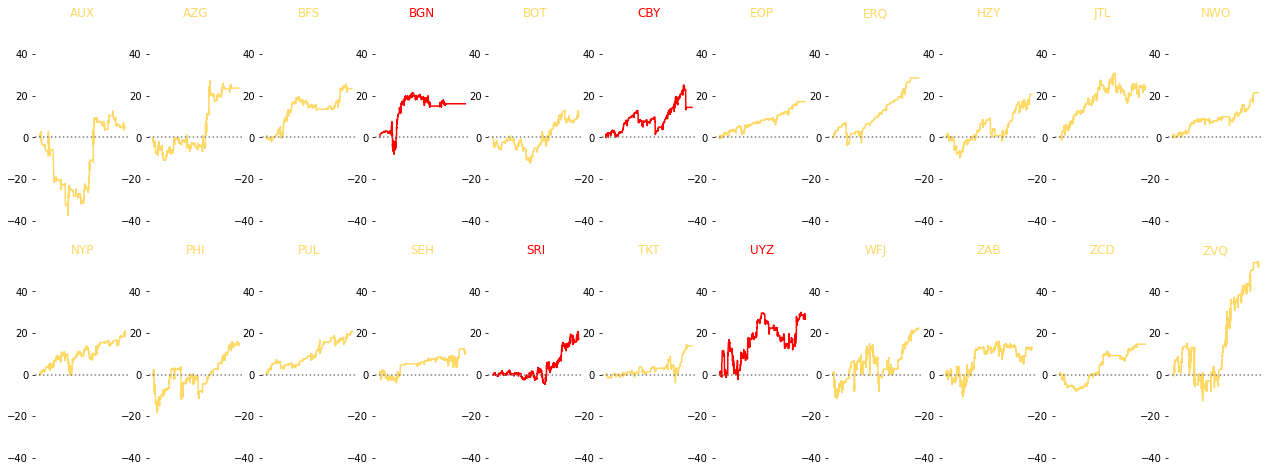

In [ ]:
# from matlab
drop=['BGN','CBY','SRI','UYZ']
wts=[0.0183,0.0485,0.0924,0.0353,0.1918,0.0837,0.0061,0.0604,0.0509,0.0553,0.0386,0.0686,0.0192,0.0605,0.0162,0.0203,0.1249,0.0090]
dars=['AUX', 'AZG', 'BFS', 'BOT', 'EOP', 'ERQ', 'HZY', 'JTL', 'NWO', 'NYP', 'PHI', 'PUL', 'SEH', 'TKT', 'WFJ', 'ZAB', 'ZCD', 'ZVQ']
plot_dars(to_matlab)
plt.savefig('round1.png')

### Ronda 2: Quita los `darwins` autocorrelacionados

In [ ]:
to_matlab=sorted(means.sort_values('mean', ascending=False).index[:26])
to_matlab.remove('BGN')
to_matlab.remove('CBY')
to_matlab.remove('SRI')
to_matlab.remove('UYZ')

print('new:',sorted(means.sort_values('mean', ascending=False).index[22:26]))
print('darwins',to_matlab)
print('AssetMean',[round(hly_rtns[darwin].mean(),6) for darwin in to_matlab])
print('AssetCovar',np.round(np.cov(np.array([hly_rtns[dar] for dar in to_matlab]),bias=True), 6))

new: ['FIR', 'HEO', 'MUF', 'TXR']
darwins ['AUX', 'AZG', 'BFS', 'BOT', 'EOP', 'ERQ', 'FIR', 'HEO', 'HZY', 'JTL', 'MUF', 'NWO', 'NYP', 'PHI', 'PUL', 'SEH', 'TKT', 'TXR', 'WFJ', 'ZAB', 'ZCD', 'ZVQ']
AssetMean [0.006505, 0.013742, 0.012682, 0.007564, 0.007073, 0.010481, 0.005046, 0.006105, 0.011354, 0.011587, 0.005723, 0.010866, 0.007081, 0.011118, 0.006668, 0.006398, 0.008265, 0.006048, 0.012105, 0.006646, 0.009491, 0.016565]
AssetCovar [[ 3.48533e-01  5.05940e-02  5.21800e-03  5.87800e-03 -2.00280e-02
   6.02300e-03 -2.48400e-03 -2.05000e-03  9.98000e-04  3.73200e-03
  -2.27240e-02 -3.78000e-04 -3.75060e-02  7.13300e-03 -3.89190e-02
  -3.71900e-03 -5.02000e-04 -1.42800e-03  6.57500e-03 -3.35100e-03
   1.26030e-02 -1.22343e-01]
 [ 5.05940e-02  1.88605e-01  1.47700e-03  8.50300e-03 -1.41290e-02
  -2.33000e-04 -4.87000e-04  1.09700e-03  5.86900e-03 -1.27110e-02
   2.67000e-04  1.87500e-03  6.85000e-04  1.77140e-02 -1.58130e-02
  -4.80700e-03  3.64300e-03  1.17100e-03  3.11860e-02 -3.89430e

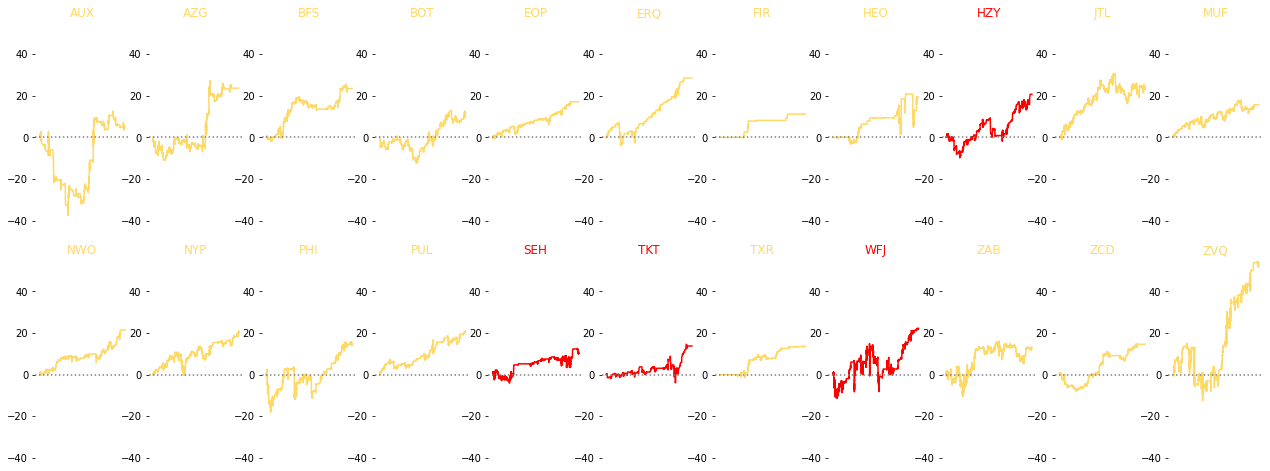

In [ ]:
# from matlab
drop=['HZY','WFJ','SEH','TKT']
dars=['AUX', 'AZG', 'BFS', 'BOT', 'EOP', 'ERQ', 'FIR', 'HEO', 'JTL', 'MUF', 'NWO', 'NYP', 'PHI', 'PUL', 'TXR', 'ZAB', 'ZCD', 'ZVQ']
wts=[0.0173,0.0379,0.0629,0.0309,0.1232,0.0654,0.2552,0.0076,0.0378,0.0235,0.0329,0.0487,0.0272,0.0383,0.0762,0.0165,0.0930,0.0055]
plot_dars(to_matlab)
plt.savefig('round2.png')

Prueba de concepto: Codalab Score, 7 abril: **10.30**

### Ronda 3: Rinse and repeat

In [ ]:
to_matlab=sorted(means.sort_values('mean', ascending=False).index[:30])
to_matlab.remove('BGN')
to_matlab.remove('CBY')
to_matlab.remove('SRI')
to_matlab.remove('UYZ')

to_matlab.remove('HZY')
to_matlab.remove('WFJ')
to_matlab.remove('SEH')
to_matlab.remove('TKT')

print('new:',sorted(means.sort_values('mean', ascending=False).index[26:30]))
print('darwins',to_matlab)
print('AssetMean',[round(hly_rtns[darwin].mean(),6) for darwin in to_matlab])
print('AssetCovar',np.round(np.cov(np.array([hly_rtns[dar] for dar in to_matlab]),bias=True), 6))

new: ['HCC', 'UEI', 'VRT', 'YFC']
darwins ['AUX', 'AZG', 'BFS', 'BOT', 'EOP', 'ERQ', 'FIR', 'HCC', 'HEO', 'JTL', 'MUF', 'NWO', 'NYP', 'PHI', 'PUL', 'TXR', 'UEI', 'VRT', 'YFC', 'ZAB', 'ZCD', 'ZVQ']
AssetMean [0.006505, 0.013742, 0.012682, 0.007564, 0.007073, 0.010481, 0.005046, 0.004247, 0.006105, 0.011587, 0.005723, 0.010866, 0.007081, 0.011118, 0.006668, 0.006048, 0.004573, 0.004117, 0.004877, 0.006646, 0.009491, 0.016565]
AssetCovar [[ 3.48533e-01  5.05940e-02  5.21800e-03  5.87800e-03 -2.00280e-02
   6.02300e-03 -2.48400e-03  1.08600e-02 -2.05000e-03  3.73200e-03
  -2.27240e-02 -3.78000e-04 -3.75060e-02  7.13300e-03 -3.89190e-02
  -1.42800e-03 -7.14000e-04  1.72140e-02  4.04300e-03 -3.35100e-03
   1.26030e-02 -1.22343e-01]
 [ 5.05940e-02  1.88605e-01  1.47700e-03  8.50300e-03 -1.41290e-02
  -2.33000e-04 -4.87000e-04  2.15010e-02  1.09700e-03 -1.27110e-02
   2.67000e-04  1.87500e-03  6.85000e-04  1.77140e-02 -1.58130e-02
   1.17100e-03 -1.85900e-03  3.25430e-02  1.32740e-02 -3.89430e

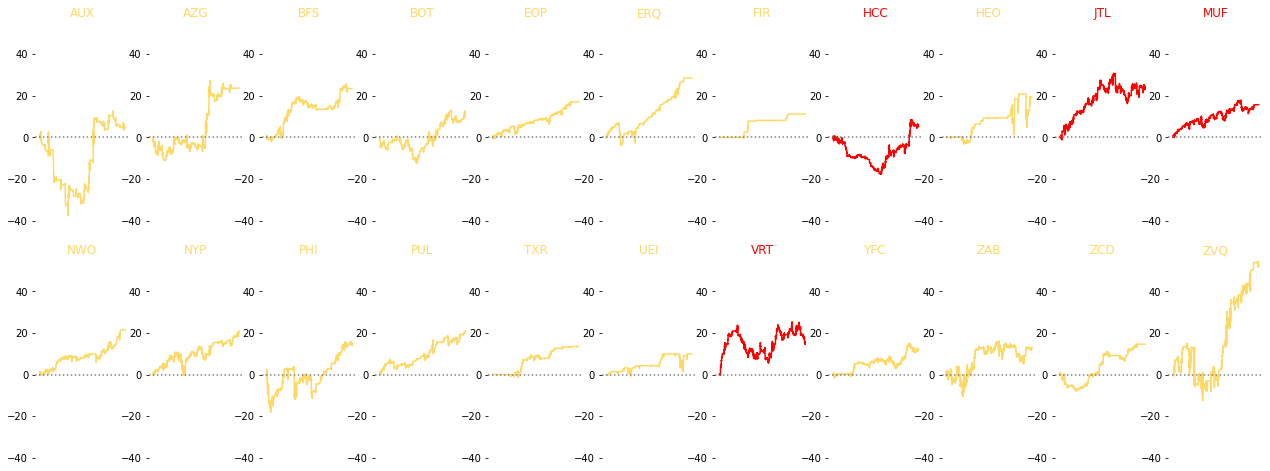

In [ ]:
# from matlab
drop=['HCC','JTL','MUF','VRT']
dars=['AUX', 'AZG', 'BFS', 'BOT', 'EOP', 'ERQ', 'FIR', 'HEO', 'NWO', 'NYP', 'PHI', 'PUL', 'TXR', 'UEI', 'YFC', 'ZAB', 'ZCD', 'ZVQ']
wts=[0.0165,0.0340,0.0680,0.0242,0.1321,0.0676,0.2115,0.0117,0.0385,0.0568,0.0292,0.0328,0.0646,0.0218,0.0718,0.0124,0.0980,0.0084]
plot_dars(to_matlab)

### Diferencias entre los Darwins de 8,3 y los Darwins de 10,3

In [ ]:
def plot_train_and_test_dars(dars, color='black'):
  rows, cols=2, int(.5+len(dars)/2)
  fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize=(20, 8))
  for i in range(rows):
    for j in range(cols):
      darwin=dars[cols*i+j]
      ax[i][j].plot(candles[candles.darwin==darwin].date.apply(lambda x: x.date()).to_list()+hourly[hourly.darwin==darwin].hour.apply(lambda x: x.date()).to_list(),
                    (candles[candles.darwin==darwin]['open']-candles[candles.darwin==darwin]['open'][0]).to_list()+(hourly[hourly.darwin==darwin]['first']-candles[candles.darwin==darwin]['open'].to_list()[0]).to_list(),
                     color=color)
      ax[i][j].set_title(darwin, color=color, loc='center', y=0.8)
      ax[i][j].set_ylim(-50,170)
      ax[i][j].set_frame_on(False)
      ax[i][j].set_xlabel('Entrenamiento | Test')
      ax[i][j].set_xticklabels([])
      ax[i][j].axvline(x=hourly[hourly.darwin==darwin].hour.apply(lambda x: x.date()).to_list()[0], color='grey', linestyle='dashed')
      ax[i][j].axhline(y=0, color='grey', linestyle='dotted')

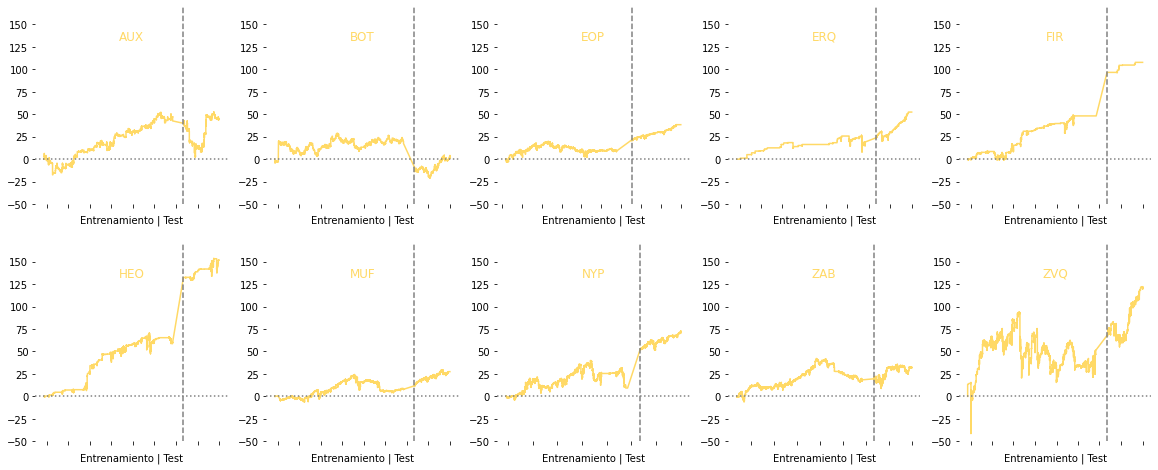

In [ ]:
# nuevos por 10,3
dars=['AUX','BOT','EOP','ERQ','FIR','HEO','MUF','NYP','ZAB','ZVQ']
plot_train_and_test_dars(dars,color='#ffd966')
plt.savefig('train_test.png')

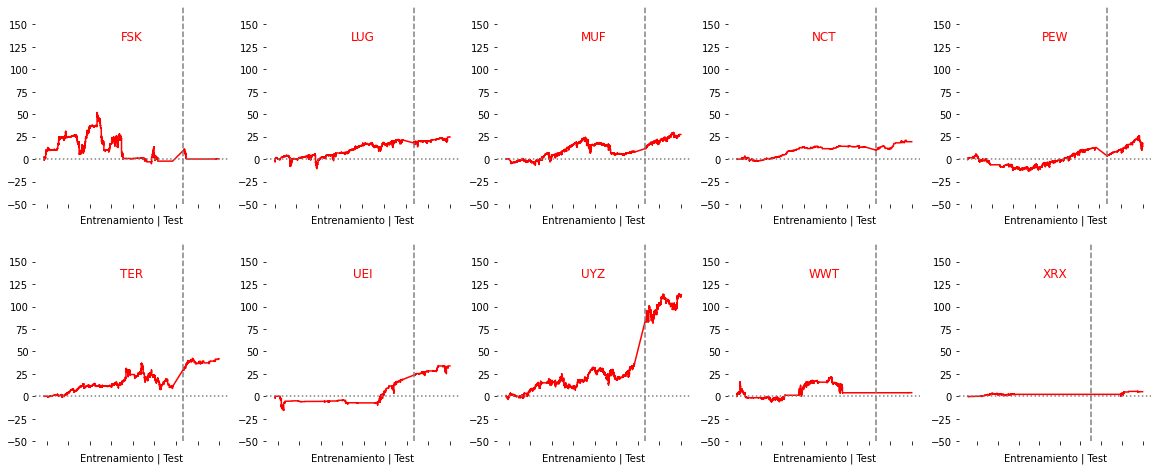

In [ ]:
# en 8,3 pero no en 10,3
dars=['FSK','LUG','MUF','NCT','PEW','TER','UEI','UYZ','WWT','XRX']
plot_train_and_test_dars(dars,color='red')

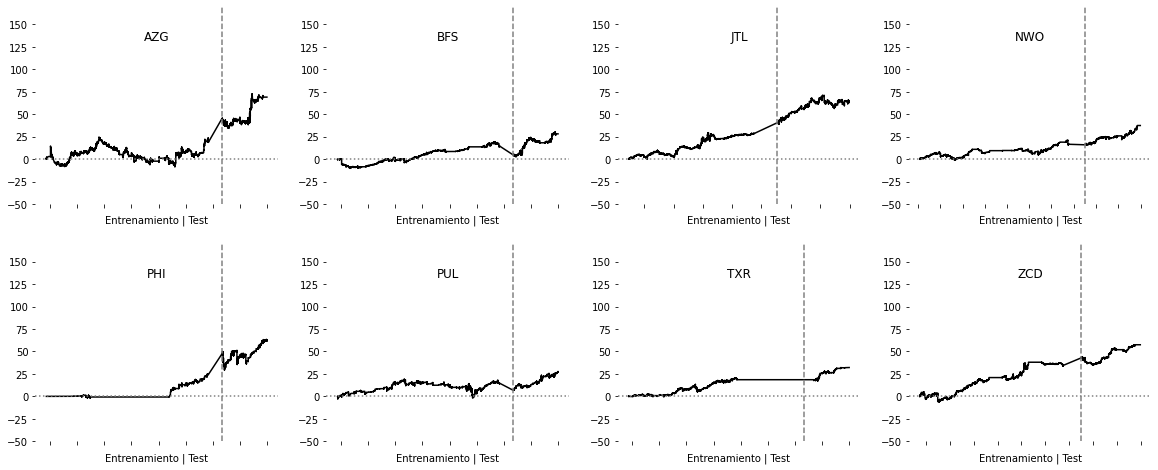

In [ ]:
# en 8,3 y 10,3
dars=['AZG','BFS','JTL','NWO','PHI','PUL','TXR','ZCD']
plot_train_and_test_dars(dars)

# Reflexiones

- El hecho de repensar lo que hice por el reto con la idea de explicarlo a otros resultó ser una forma estupenda de revelar los fallos.
- ¡Para y piensa! Haz un 'time-out' para repensar. Vale la pena revisar todos los puntos de decisión y replantar el problema.
- ¡Ten paciencia!
  - espera el tiempo de descarga de todos los datos, aunque sean horas
  - espera a que el algoritmo de MATLAB converja, invertas horas en hacerlo
- ¡Concéntrate en una sola tarea!
  - Todos tenemos que lidiar con muchas tareas.
  - Necesitas tener la cabeza despejada.
  - Es mejor trabajar secuencialmente que en paralelo (no soy un GPU).
- Cree en ti mismo.
- Aprendemos haciendo.
- ...


También he conseguido el cuarto puesto, junto con #javic y #agnprz, en el reto de visión por ordenador y el sexto puesto en el reto de PLN. Si tienes datos a entender, estaré encantada de ayudarte 😊

Gracias a [SPAIN-AI](https://www.spain-ai.com/index.php), [Darwinex](https://https://www.darwinex.com/es/) y los demás participantes.